<a href="https://colab.research.google.com/github/imdeepmind/CrowdCounter/blob/master/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Getting the dataset into proper place
!mkdir data
!cp '/content/drive/My Drive/datasets/dataset.zip' ./
!unzip -qq dataset.zip -d ./data/
!rm dataset.zip

In [22]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Some basic EDA
labels = pd.read_csv('data/labels.csv')

labels.head()

,id,count
0,1,35
1,2,41
2,3,41
3,4,44
4,5,41


In [12]:
labels.shape

(2000, 2)

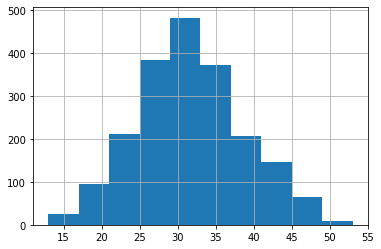

In [13]:
labels['count'].hist()

In [14]:
max(labels['count'])

53

In [15]:
min(labels['count'])

13

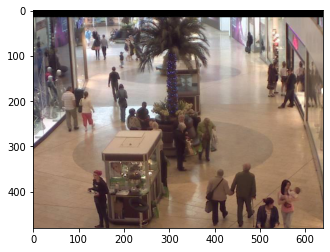

In [18]:
img = mpimg.imread('/content/data/frames/frames/seq_000001.jpg')
plt.imshow(img)

In [28]:
preprocessed_labels = []
preprocessed_images = []

images = os.listdir("/content/data/frames/frames")

for (id, count) in labels.values:
  preprocessed_labels.append(count)
  preprocessed_images.append(images[id-1])

In [29]:
df = pd.DataFrame(columns=['image', 'count'])
df['image'] = preprocessed_images
df['count'] = preprocessed_labels

df.head()

,image,count
0,seq_000689.jpg,35
1,seq_000516.jpg,41
2,seq_000217.jpg,41
3,seq_000870.jpg,44
4,seq_000324.jpg,41


In [30]:
df.to_csv('./data/processed.csv', index=False)